# Chi-Square Test (independence test)

* We're comparing between types of videos and the types of bullsit risk, to see whether they're independent between each other or not.
* To do that, we create a contingency table below.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from plotnine import *

df = pd.read_csv("../data/Main Coder Data/Main_Coder_Only.csv")

contingency_table = pd.crosstab(df['Type of Video'], df['Risk of Bullshit'])



In [2]:
contingency_table

Risk of Bullshit,Bullshit,High,Low,Reducing Risk
Type of Video,,,,
Advertisement,0,3,10,0
Cautionary,1,0,7,0
Education,4,40,64,11
Entertainment,3,1,14,0
Events,0,1,14,2
Experiment,0,2,18,4
Experiment Illegal,0,0,2,0
Hype,0,0,3,0


In [8]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05 #significance level

print("Chi-square statistic:", chi2)
print('p-value', p)
if p < alpha:
  print('There is a significant relationship between 2 variables')
else:
  print("There is no significant relationship between 2 variables")



Chi-square statistic: 38.760912177448475
p-value 0.01048080055392249
There is a significant relationship between 2 variables


In [9]:
expected

array([[ 0.50980392,  2.99509804,  8.41176471,  1.08333333],
       [ 0.31372549,  1.84313725,  5.17647059,  0.66666667],
       [ 4.66666667, 27.41666667, 77.        ,  9.91666667],
       [ 0.70588235,  4.14705882, 11.64705882,  1.5       ],
       [ 0.66666667,  3.91666667, 11.        ,  1.41666667],
       [ 0.94117647,  5.52941176, 15.52941176,  2.        ],
       [ 0.07843137,  0.46078431,  1.29411765,  0.16666667],
       [ 0.11764706,  0.69117647,  1.94117647,  0.25      ]])

In [6]:
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=38.760912177448475, pvalue=0.01048080055392249, dof=21, expected_freq=array([[ 0.50980392,  2.99509804,  8.41176471,  1.08333333],
       [ 0.31372549,  1.84313725,  5.17647059,  0.66666667],
       [ 4.66666667, 27.41666667, 77.        ,  9.91666667],
       [ 0.70588235,  4.14705882, 11.64705882,  1.5       ],
       [ 0.66666667,  3.91666667, 11.        ,  1.41666667],
       [ 0.94117647,  5.52941176, 15.52941176,  2.        ],
       [ 0.07843137,  0.46078431,  1.29411765,  0.16666667],
       [ 0.11764706,  0.69117647,  1.94117647,  0.25      ]]))

In [7]:
stats.chi2_contingency(contingency_table, lambda_="log-likelihood")

Chi2ContingencyResult(statistic=45.144056216312066, pvalue=0.0016581395213414198, dof=21, expected_freq=array([[ 0.50980392,  2.99509804,  8.41176471,  1.08333333],
       [ 0.31372549,  1.84313725,  5.17647059,  0.66666667],
       [ 4.66666667, 27.41666667, 77.        ,  9.91666667],
       [ 0.70588235,  4.14705882, 11.64705882,  1.5       ],
       [ 0.66666667,  3.91666667, 11.        ,  1.41666667],
       [ 0.94117647,  5.52941176, 15.52941176,  2.        ],
       [ 0.07843137,  0.46078431,  1.29411765,  0.16666667],
       [ 0.11764706,  0.69117647,  1.94117647,  0.25      ]]))

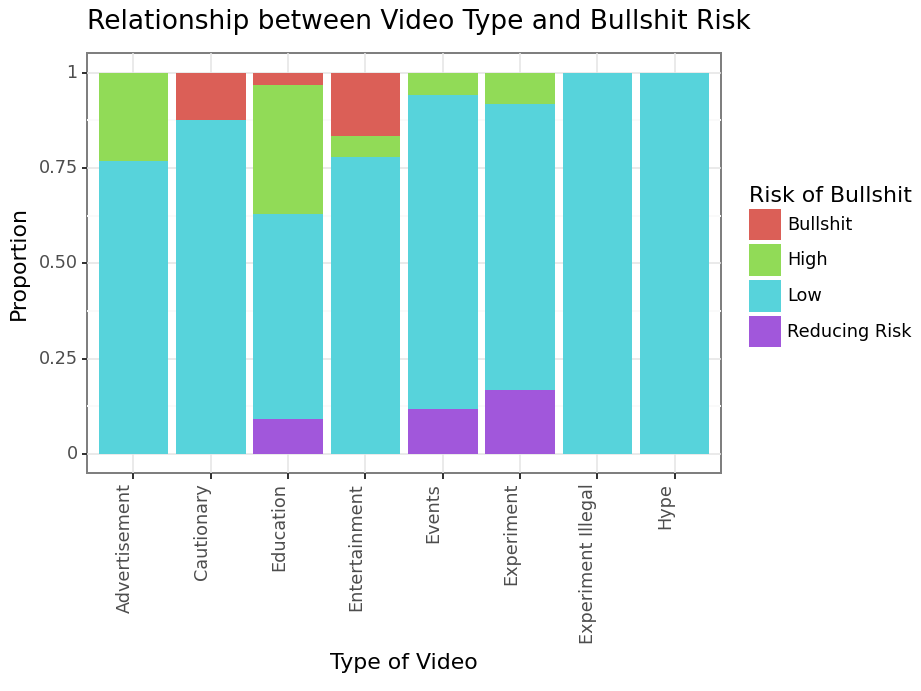

In [4]:
plot = (
    ggplot(df, aes(x="Type of Video", fill="Risk of Bullshit")) +
    geom_bar(position="fill") +
    labs(title="Relationship between Video Type and Bullshit Risk",
         x="Type of Video", y="Proportion") +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90, hjust=1))
)

plot.draw()